In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ica

In [2]:
def get_source(nSig, nSample, shape=0.2):
    h = np.random.gamma(shape=shape, scale=1, size=(nSig, nSample)) # time-varying variance
    s = np.random.normal(scale=np.sqrt(h)) # generated source signal
    return s, h

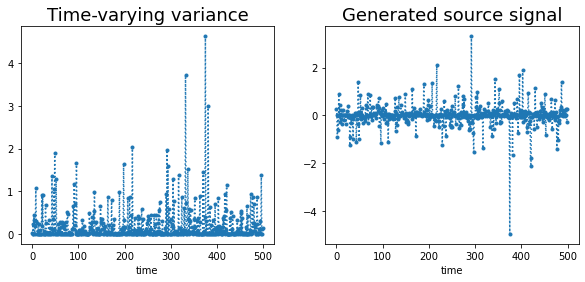

In [3]:
# one source generated from time-varying Gaussian model
s, h = get_source(nSig=1, nSample=500)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(h.T, '.:'), plt.xlabel('time')
plt.title('Time-varying variance', size=18)
plt.subplot(122)
plt.plot(s.T, '.:'), plt.xlabel('time')
plt.title('Generated source signal', size=18)
plt.savefig('time_varying_Gaussian.png')

([<matplotlib.lines.Line2D at 0x2cbc0f3be80>],
 Text(0.5, 0, 's1'),
 Text(0, 0.5, 's2'))

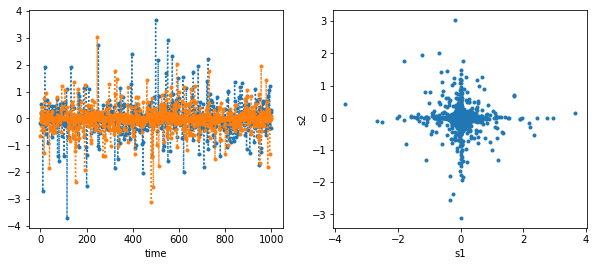

In [4]:
# two sources generated from time-varying Gaussian model
np.random.seed(seed=0)
nSig = 2
s, h = get_source(nSig=nSig, nSample=1000)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(s.T, '.:'), plt.xlabel('time')
plt.subplot(122)
plt.plot(s[0], s[1], '.'), plt.xlabel('s1'), plt.ylabel('s2')

[[1.  0.3]
 [0.4 0.7]]


([<matplotlib.lines.Line2D at 0x2cbc0ff6fa0>],
 Text(0.5, 0, 'x1'),
 Text(0, 0.5, 'x2'))

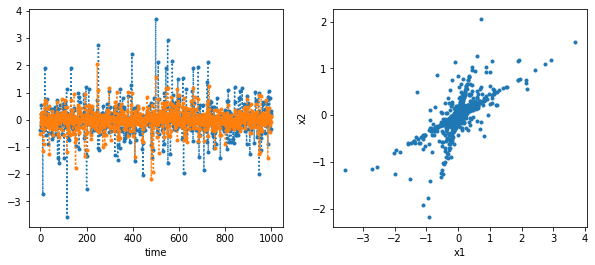

In [5]:
# 2x2 mixing matrix and two mixtures
A = np.array([[1, 0.3], [0.4, 0.7]])
print(A)
x = A.dot(s)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(x.T, '.:'), plt.xlabel('time')
plt.subplot(122)
plt.plot(x[0], x[1], '.'), plt.xlabel('x1'), plt.ylabel('x2')

In [6]:
# ICA
nLoop = 20
bss = ica.ICA(x, nSig)
bss.optimization(nLoop)
y = bss.W.dot(x)

([<matplotlib.lines.Line2D at 0x2cbc10b6640>],
 Text(0.5, 0, 'y1'),
 Text(0, 0.5, 'y2'))

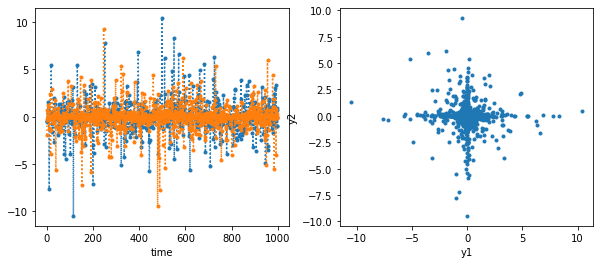

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(y.T, '.:'), plt.xlabel('time')
plt.subplot(122)
plt.plot(y[0], y[1], '.'), plt.xlabel('y1'), plt.ylabel('y2')

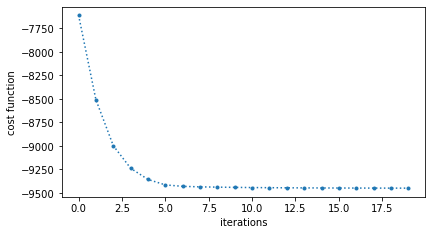

In [8]:
plt.figure(figsize=(6.5, 3.5))
plt.plot(bss.losshist, '.:')
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.savefig('convergence.png')

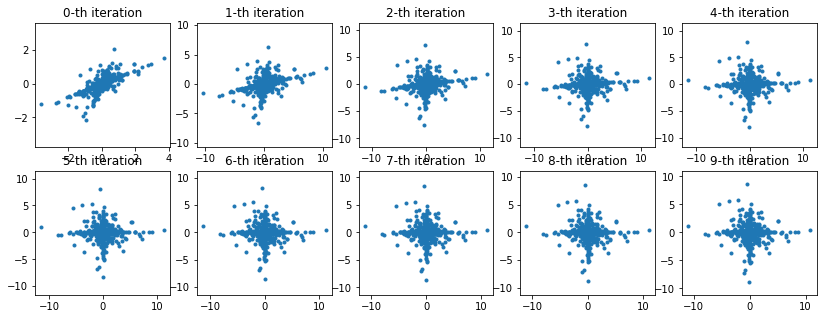

In [9]:
plt.figure(figsize=(14,5))
for i, W in enumerate(bss.Whist[:10]):
    plt.subplot(2, 5, i+1)
    y = W.dot(x)
    plt.plot(y[0], y[1], '.'), plt.title(f'{i}-th iteration')
    plt.axis('equal')
plt.savefig('y_changes.png')